In [15]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-01-29 04:34:03,451: Credentials are already in use. The existing account in the session will be replaced.


In [18]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.utils import algorithm_globals

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN

algorithm_globals.random_seed = 42

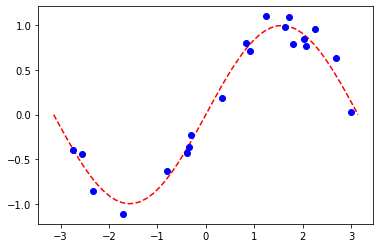

In [19]:
num_samples = 20
eps = 0.2
lb, ub = -np.pi, np.pi
X_ = np.linspace(lb, ub, num=50).reshape(50, 1)
f = lambda x: np.sin(x)

X = (ub - lb) * algorithm_globals.random.random([num_samples, 1]) + lb
y = f(X[:, 0]) + eps * (2 * algorithm_globals.random.random(num_samples) - 1)

plt.plot(X_, f(X_), "r--")
plt.plot(X, y, "bo")
plt.show()

In [20]:
# construct simple feature map
param_x = Parameter("x")
feature_map = QuantumCircuit(1, name="fm")
feature_map.ry(param_x, 0)

# construct simple ansatz
param_y = Parameter("y")
ansatz = QuantumCircuit(1, name="vf")
ansatz.ry(param_y, 0)

# construct a circuit
qc = QuantumCircuit(1)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)

# construct QNN
regression_estimator_qnn = EstimatorQNN(
    circuit=qc, input_params=feature_map.parameters, weight_params=ansatz.parameters
)

In [22]:
# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [23]:
# construct the regressor from the neural network
regressor = NeuralNetworkRegressor(
    neural_network=regression_estimator_qnn,
    loss="squared_error",
    optimizer=L_BFGS_B(maxiter=5),
    callback=callback_graph,
)

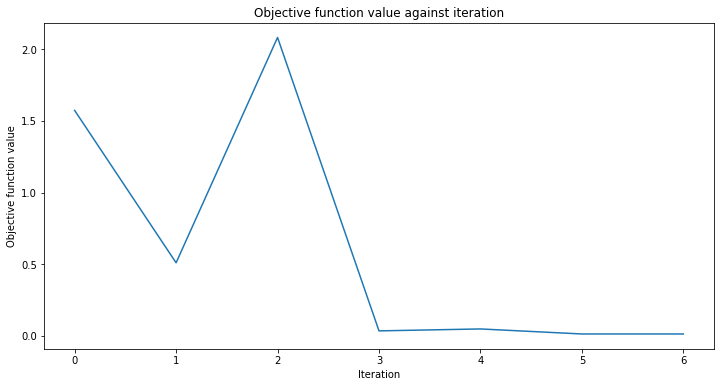

0.9733353285953001

In [24]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit to data
regressor.fit(X, y)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score the result
regressor.score(X, y)

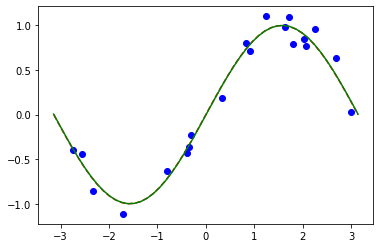

In [25]:
# plot target function
plt.plot(X_, f(X_), "r--")

# plot data
plt.plot(X, y, "bo")

# plot fitted line
y_ = regressor.predict(X_)
plt.plot(X_, y_, "g-")
plt.show()

In [3]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import AmplitudeEmbedding

In [14]:
# @qml.qnode(qml.device('qiskit.ibmq', wires=num_qubits, backend='ibmq_qasm_simulator',
    #                       ibmqx_token="f75a3efcda7934b18c5ae023d3becc2d00537f13d500bdca5c7844385fa019f9bc84d766098e28d2"
    #                                   "c836a4c952434b6e2e902f173b5678c1de89bfe776a9ac81",
    #                       hub='ibm-q-ornl', group='ornl', project='csc442'))
@qml.batch_params(all_operations=True)
@qml.qnode(qml.device('qiskit.aer', wires=2))#backend='ibmq_qasm_simulator', ibmqx_token="0cf90d7aff1671833dc7c7b72fc81a131aa2dc6c8678185e79cc50255770013e4a7fb3950ad31e700136a5bdc2b245e183440d3ac3182f693e5da933959f103c"))
def embed(self, features, batch_size=1):
    print("Embedding " + str(features[0:5]))
    AmplitudeEmbedding(features=[example.astype('float64') for example in features], wires=range(self.num_qubits),
                       normalize=True, pad_with=0)
    for W in self.weights:
        self.layer(W, batch_size)
    return [qml.expval(qml.PauliZ(i)) for i in range(1)]

    # @qml.batch_params(all_operations=True)
    # @qml.qnode(qml.device('qiskit.ibmq', wires=2, backend='ibmq_qasm_simulator',
    #                       ibmqx_token="f75a3efcda7934b18c5ae023d3becc2d00537f13d500bdca5c7844385fa019f9bc84d766098e28d2"
    #                                   "c836a4c952434b6e2e902f173b5678c1de89bfe776a9ac81",
    #                       hub='ibm-q-ornl', group='ornl', project='csc442'))
    # def embed_basic(self, features=None, batch_size=1):
    #     AmplitudeEmbedding(features=[example.astype('float64') for example in features], wires=range(self.num_qubits),
    #                        normalize=True, pad_with=0)
    #     for W in self.weights:
    #         self.layer(W, batch_size)
    #     return [qml.expval(qml.PauliZ(i)) for i in range(self.num_qubits)]

def layer(self, W, batch_size=1):
    for i in range(self.num_qubits):
        qml.Rot(np.repeat(W[i, 0], batch_size), np.repeat(W[i, 1], batch_size), np.repeat(W[i, 2], batch_size),
                wires=i)
    for wire in range(self.num_qubits - 1):
        qml.CNOT(wires=[wire, self.num_qubits - 1])


Traceback (most recent call last):
  Input In [14] in <cell line: 5>
    @qml.qnode(qml.device('qiskit.aer', wires=2))#backend='ibmq_qasm_simulator', ibmqx_token="0cf90d7aff1671833dc7c7b72fc81a131aa2dc6c8678185e79cc50255770013e4a7fb3950ad31e700136a5bdc2b245e183440d3ac3182f693e5da933959f103c"))
  File /opt/conda/lib/python3.8/site-packages/pennylane/__init__.py:337 in device
    raise DeviceError("Device does not exist. Make sure the required plugin is installed.")
DeviceError: Device does not exist. Make sure the required plugin is installed.

Use %tb to get the full traceback.


In [8]:
!pip install pennylane-sf --upgrade

  Using cached PennyLane_SF-0.20.1-py3-none-any.whl (29 kB)


/bin/bash: PennyLane-SF: command not found
